In [18]:
# Initialization 
import math

# Importing Qiskit
from qiskit import transpile
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

# Import basic plot tools and circuits
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT


### Conversion of θ = 0.5 to Phase Angle

In the Quantum Phase Estimation (QPE) algorithm, we need to convert the given θ value to a phase angle. The phase angle is calculated using the formula:

$$ \text{phase angle} = 2\pi\theta $$

Given:
$$ \theta = 0.5 $$

The conversion is as follows:
$$ \text{phase angle} = 2\pi \times 0.5 = \pi \approx 3.141592653589793 $$

Thus, the phase angle corresponding to θ = 0.5 is $\pi$.


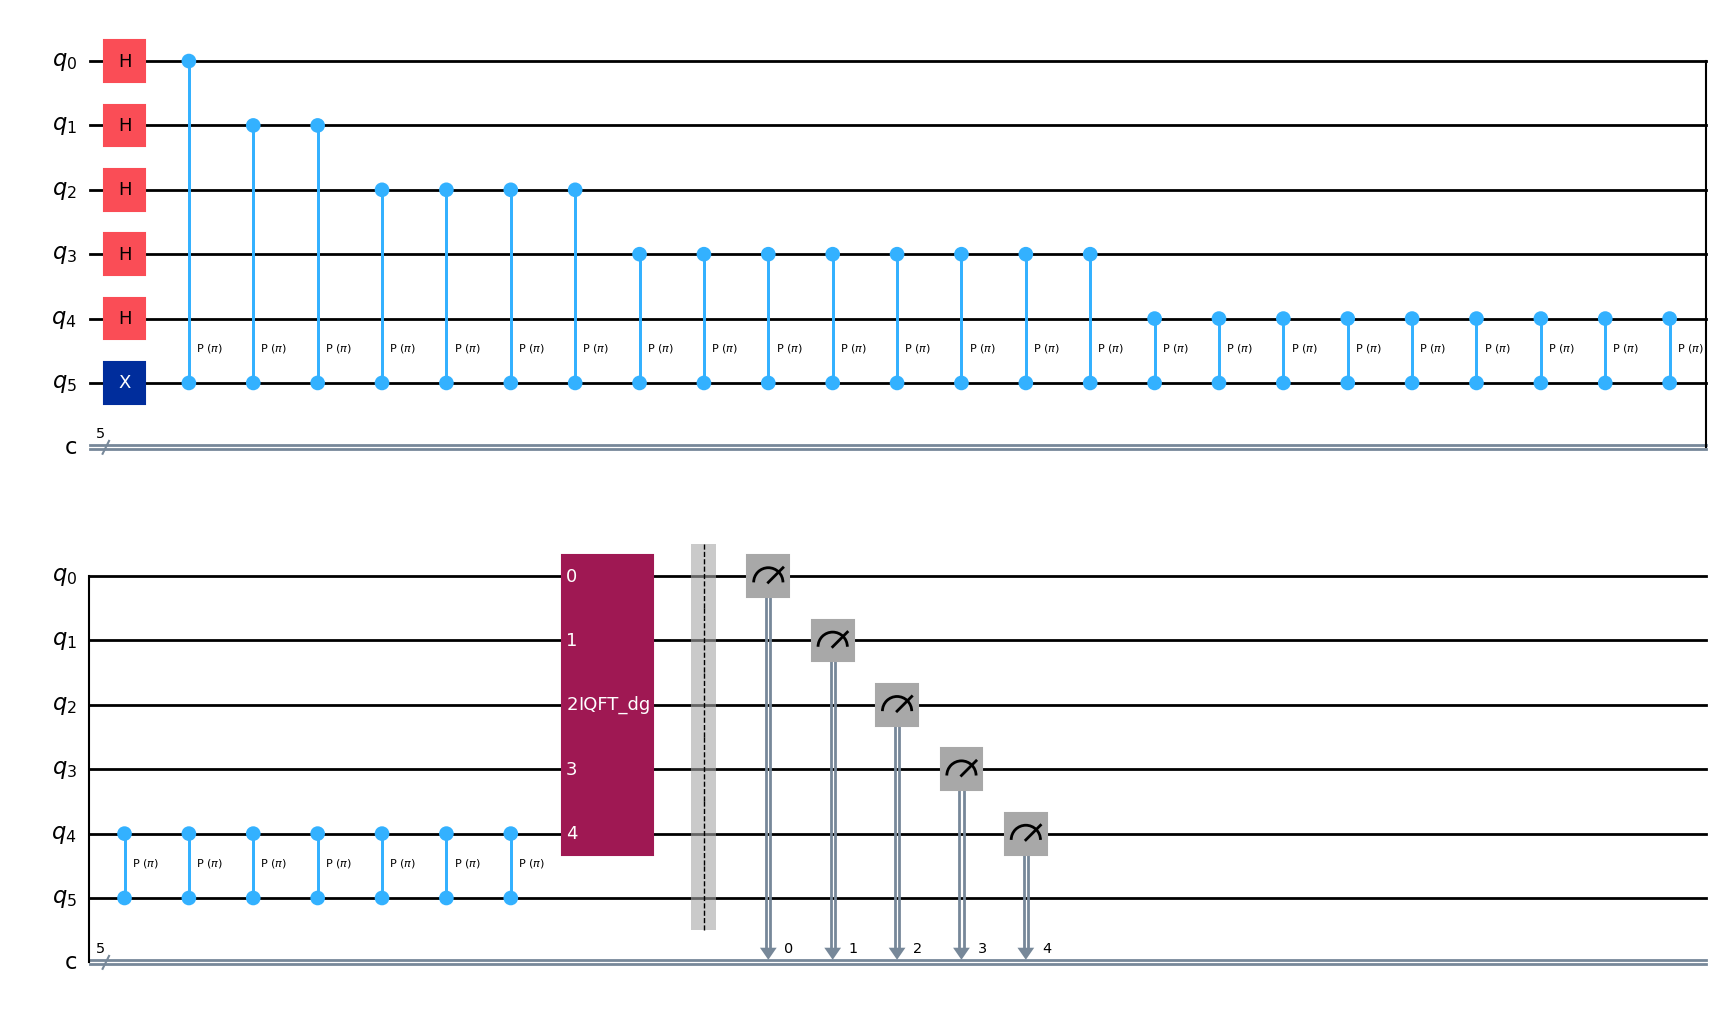

In [ ]:
# Create and set up circuit with 6 qubits (5 counting + 1 eigenstate)
qpe = QuantumCircuit(6, 5)

# Apply H-gates to counting qubits
for qubit in range(5):
    qpe.h(qubit)

qpe.x(5)

# Do controlled-U operations with θ = 0.5
angle = math.pi  # Convert θ to phase angle
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe.cp(angle, counting_qubit, 5)
    repetitions *= 2

# Apply inverse QFT
qpe = qpe.compose(QFT(5, inverse=True), range(5))

# Measure counting qubits
qpe.barrier()
for n in range(5):
    qpe.measure(n, n)

qpe.draw('mpl')

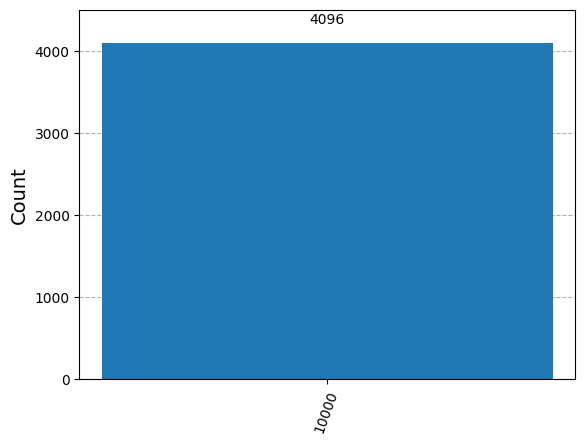

In [17]:
aer_sim = AerSimulator()
shots = 4096
t_qpe = transpile(qpe, aer_sim)
results = aer_sim.run(t_qpe, shots=shots).result()
answer = results.get_counts()


plot_histogram(answer)

We see we get one result (`10000`) with certainty, which translates to the decimal: `16`. We now need to divide our result (`16`) by $2^n$ to get $\theta$:



$$ \theta = \frac{16}{2^5} = \frac{16}{32} $$

This gives us the expected result of $\theta = 0.5$.